# 准备数据集

In [2]:
import numpy as np
np.random.seed(2021) # set a constant seed to get samerandom matrixs
A = np.random.rand(500, 100)
x_ = np.zeros([100, 1])
x_[:5, 0] += np.array([i+1 for i in range(5)]) # x_denotes expected x
b = np.matmul(A, x_) +np.random.randn(500, 1) *0.1 #add a noise to b
lam = 10 # try some different values in {0.1, 1, 10}


# Proximal Gradient Descent

In [3]:
# 软阈值函数 s_t(x)
def Soft_Thresholding(r,x):
    result = np.zeros([len(x), 1])
    for i in range(len(x)):
        if x[i]>r:
            result[i] = x[i]-r
        elif -r<=x[i]<=r:
            result[i] = 0
        elif x[i]<-r:
            result[i] = x[i]+r
        else:
            np.ERR_WARN("输入变量有非数值变量")
    return result
def target_function(x):
    return 1/2*(np.linalg.norm(A@x - b, ord=2) ** 2) + lam*np.linalg.norm(x,ord=1)
import matplotlib.pyplot as plt
def make_plot(result_matrix,colnames,lam,name):
    plt.figure(num=1, figsize=(16, 7))
    x = [0.]+list(np.log(result_matrix[1:,0])) # 对x轴进行log采样
    for i in range(1,6): #令i依次为x_1,x_2,....,x_5的列标
        y = result_matrix[:,i]
        y_lable = colnames[i]
        plt.subplot(121)
        plt.plot(x,y,label = y_lable, linewidth = 0.5,color = "blue")
    plt.title("Converage of X\nlambda = {}".format(lam))
    plt.legend()
    plt.subplot(122)
    plt.plot(x,result_matrix[:,-1],label = "Target Function",linewidth = 2, color = "red")
    plt.xlabel("Log Iteration Times")
    plt.title("Converage of Target function\nlambda = {}".format(lam))
    plt.savefig(name + " Converage of lambda {}.png".format(lam),dpi = 500)
    plt.show()

****************************************************************************************************
lambda为：0.1
迭代次数为：11583
目标函数最优值为：161.76162041300677 
最优解中非零元素的个数：83
最优解为：
[array([ 1.02699279e+00,  1.97548064e+00,  3.00898077e+00,  3.96911781e+00,
        5.00888533e+00,  6.14080817e-03,  8.78371697e-03,  0.00000000e+00,
       -2.50254532e-03,  5.36694128e-03,  0.00000000e+00,  0.00000000e+00,
       -9.92250354e-03, -1.41243577e-03,  1.46579411e-02, -5.51575423e-03,
       -5.81930170e-03,  2.65022058e-03,  4.32792357e-03,  1.75079163e-02,
        6.36962230e-03, -8.91804092e-03, -1.11849788e-03,  1.09279533e-02,
        2.17333134e-02, -5.70331423e-03, -1.24699056e-02,  0.00000000e+00,
       -8.53745403e-03, -1.12283196e-02,  1.77966315e-02, -2.81934856e-02,
        0.00000000e+00,  2.84466413e-03, -1.56483299e-02, -5.00800582e-03,
        0.00000000e+00,  1.90432624e-02,  1.30734198e-02, -1.28613961e-02,
       -1.02067556e-02,  3.44123624e-03, -6.26522414e-02,  0.00000000e+00,

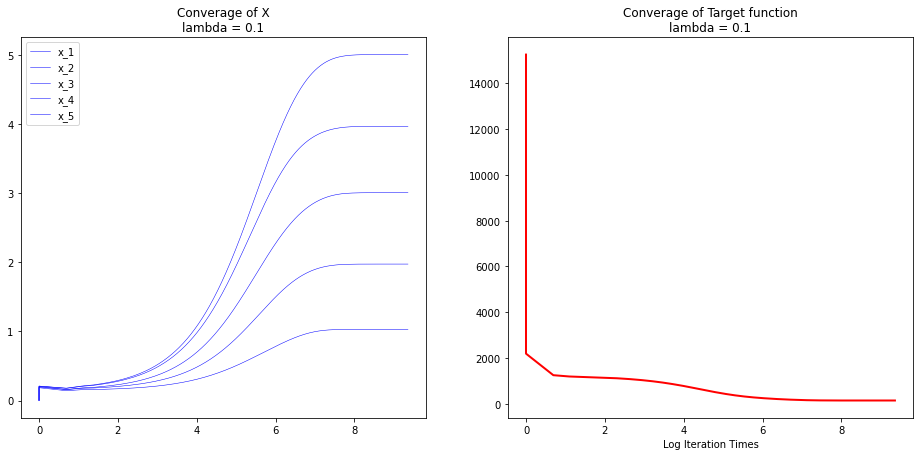

****************************************************************************************************
lambda为：1
迭代次数为：7072
目标函数最优值为：152.75977442209626 
最优解中非零元素的个数：22
最优解为：
[array([ 1.00528902e+00,  1.96140737e+00,  2.98836366e+00,  3.95517755e+00,
        4.98537467e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.48441538e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  7.93971511e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.37451878e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.35393647e-02,  0.00000000e+00,
  

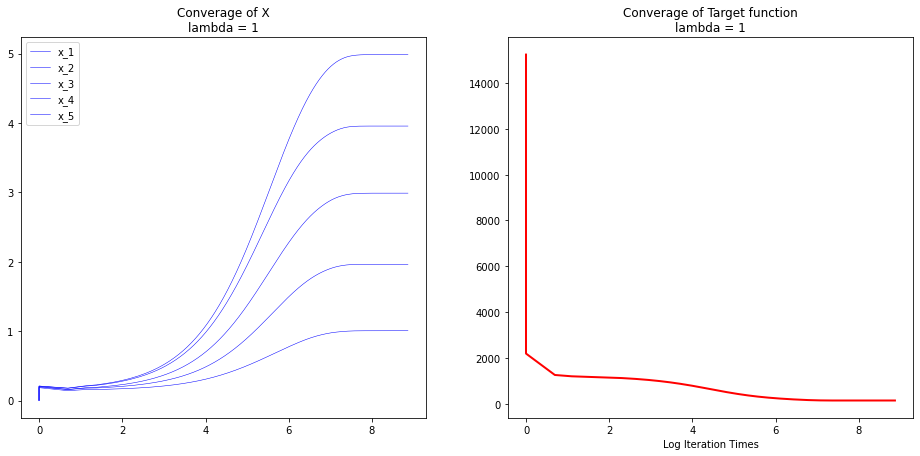

****************************************************************************************************
lambda为：10
迭代次数为：5836
目标函数最优值为：151.93227105788 
最优解中非零元素的个数：11
最优解为：
[array([9.91578620e-01, 1.96261371e+00, 2.97499677e+00, 3.95205915e+00,
       4.97976441e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.66588765e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.61058313e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.09820723e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.39687184e-02, 0.0000000

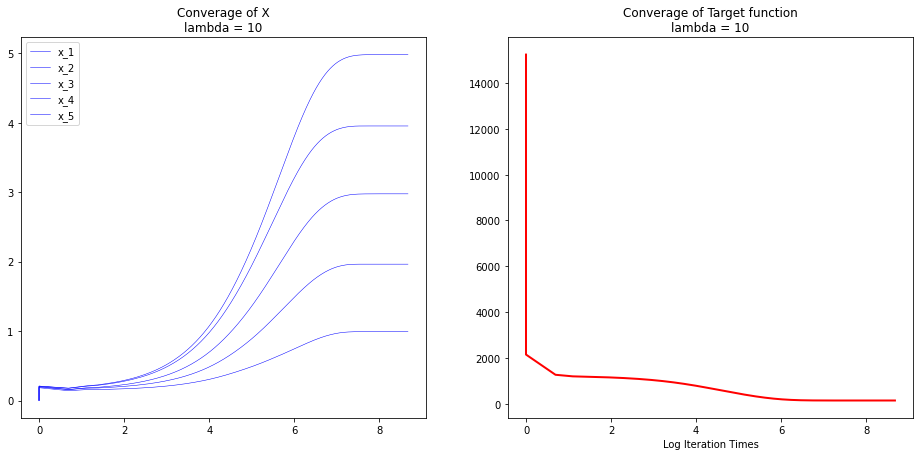

In [5]:
# 近端梯度下降法 min f(x） = min g(x)+ h(x)，其中h不可微
def Proximal_GD_for_Lasso(A,b,eps,step,lam):
    t = 0 #计数器
    s = step
    x = np.zeros([A.shape[1], 1])# 初始值全0矩阵
    err = np.inf
    result_matrix = np.c_[t,x.T,target_function(x)]
    while (err > eps and t < 1e7):
        origin_x = x
        dgx = A.T@(A@x-b)
        x = Soft_Thresholding(s*lam,x-s*dgx)
        fx = target_function(x)
        err = np.linalg.norm(origin_x - x,ord=1)
        t += 1
        result_matrix = np.r_[result_matrix,np.c_[t,x.T,fx]] #结果存入矩阵方便画图
        #print(np.count_nonzero(x)) #调试用代码
        #print (1/2*(np.linalg.norm(A@x - b, ord=2) ** 2))
    print("*"*100 + "\nlambda为：{lam}\n迭代次数为：{t}\n目标函数最优值为：{fx} \n最优解中非零元素的个数：{x_is0}\n最优解为：\n{x}\n".format(lam = lam,t = t, fx = fx,x_is0 = np.count_nonzero(x),x = list(x.T)))
    return result_matrix
colnames = ["iteration​"] + ["x_{}".format(i) for i in range(1,A.shape[1]+1)] + ["target_function"] #创建result_matrix的列名列表，形如：["iteration​","x_1","x_2",...,"x_100","target_function"]
result1 = Proximal_GD_for_Lasso(A,b,eps = 1e-10,step = 1e-4,lam = 0.1)
make_plot(result1,colnames,0.1,"PGD")
result2 = Proximal_GD_for_Lasso(A,b,eps = 1e-10,step = 1e-4,lam = 1)
make_plot(result2,colnames,1,"PGD")
result3 = Proximal_GD_for_Lasso(A,b,eps = 1e-10,step = 1e-4,lam = 10)
make_plot(result3,colnames,10,"PGD")

# BCD

****************************************************************************************************
lambda为：0.1
迭代次数为：677
目标函数最优值为：169.3241335658165 
最优解为：
[array([ 1.01497573e+00,  1.95699565e+00,  3.00454193e+00,  3.96483701e+00,
        4.99779927e+00, -2.24232158e-03,  4.00167743e-04, -1.60964557e-02,
       -2.92542132e-02,  5.67635399e-03, -2.09519974e-02, -2.07136643e-02,
       -2.00487709e-02,  1.37205838e-04,  2.09117601e-02, -2.29109665e-02,
       -1.66269619e-02, -3.90342426e-03, -3.07511811e-03, -1.64905575e-03,
        2.78610219e-03, -3.08993233e-02, -2.00028040e-02,  3.51098947e-03,
        2.96107510e-02, -1.08271794e-02, -1.72430088e-02, -3.77861719e-03,
       -2.70708366e-02, -2.11624594e-02,  1.48034472e-02, -4.64280999e-02,
       -2.24569139e-03, -1.04205179e-02, -4.40894973e-02, -2.04982042e-02,
       -1.35877127e-02,  2.36383941e-02, -1.01629180e-05, -1.56364957e-02,
       -8.20796625e-03,  5.90159854e-03, -7.29216695e-02, -1.08390917e-02,
        5.0917065

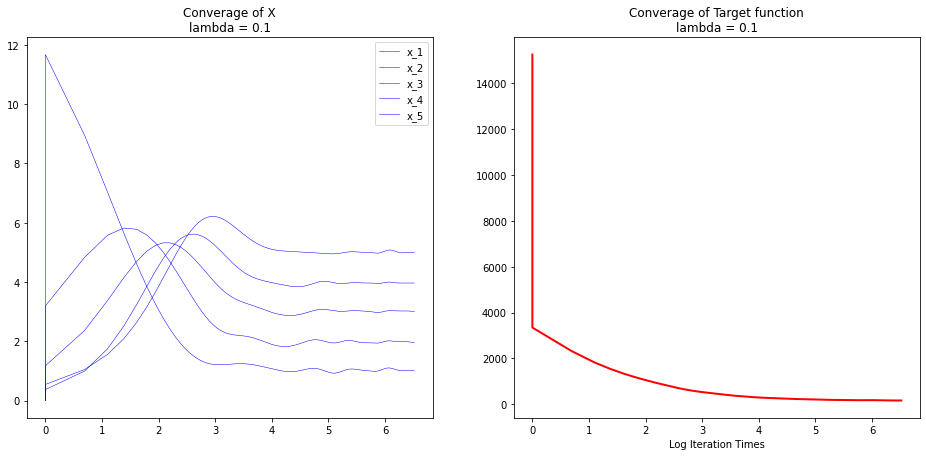

****************************************************************************************************
lambda为：1
迭代次数为：677
目标函数最优值为：169.32281176358563 
最优解为：
[array([ 1.01496582e+00,  1.95698009e+00,  3.00452326e+00,  3.96483203e+00,
        4.99778881e+00, -2.25093538e-03,  3.86068206e-04, -1.61020137e-02,
       -2.92482049e-02,  5.67373123e-03, -2.09538937e-02, -2.07192568e-02,
       -2.00736005e-02,  1.38864357e-04,  2.08969241e-02, -2.29113538e-02,
       -1.66174230e-02, -3.90090484e-03, -3.08622415e-03, -1.64953669e-03,
        2.77625295e-03, -3.08967370e-02, -1.99969061e-02,  3.51398769e-03,
        2.95931967e-02, -1.08325807e-02, -1.72430346e-02, -3.77390999e-03,
       -2.70815174e-02, -2.11465517e-02,  1.48125004e-02, -4.64299860e-02,
       -2.23801797e-03, -1.04216853e-02, -4.40806253e-02, -2.05150296e-02,
       -1.36025277e-02,  2.36350496e-02, -3.14443692e-05, -1.56502399e-02,
       -8.21803880e-03,  5.87689604e-03, -7.29285251e-02, -1.08796594e-02,
        5.07318847

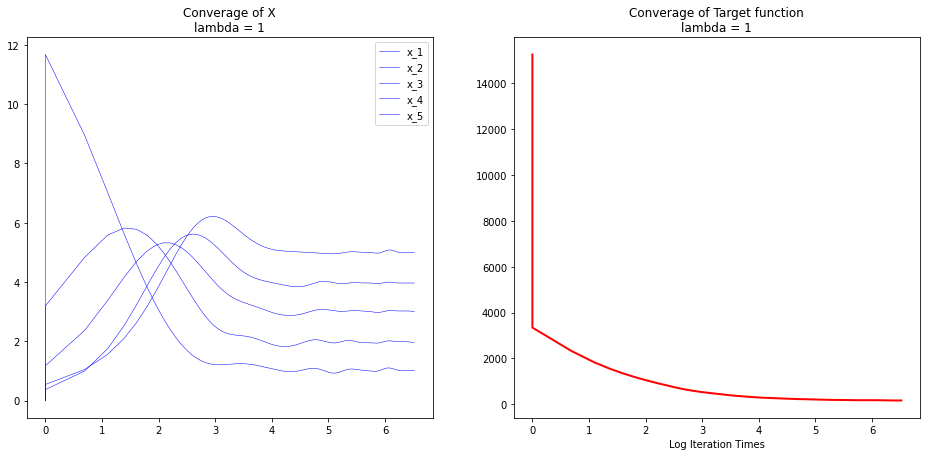

****************************************************************************************************
lambda为：10
迭代次数为：565
目标函数最优值为：171.67190606638644 
最优解为：
[array([ 1.00476658e+00,  1.98489239e+00,  3.02427713e+00,  3.96679065e+00,
        4.98465856e+00,  7.47658134e-03, -5.55173047e-03, -1.53355773e-02,
       -2.22022686e-02, -1.91514446e-02, -9.70308752e-03, -3.00154221e-03,
       -2.33221383e-02, -3.04978561e-02,  1.80929424e-02, -9.42423837e-03,
       -1.44813874e-02,  2.38920559e-03,  2.26577105e-02,  2.46984998e-02,
        1.14853808e-02, -1.37782358e-03,  5.87057797e-03,  2.25193463e-02,
        4.38306457e-02,  1.35051879e-02, -1.48295671e-02,  1.67108989e-02,
        2.60495525e-02, -7.04833084e-05,  5.67473123e-02,  1.56214697e-02,
        3.42399039e-02,  4.65525484e-02,  2.10461766e-02,  3.61238907e-02,
        5.29667420e-02,  5.24754810e-02,  4.98257993e-02,  2.64710758e-02,
        9.41764984e-03,  4.17021622e-02, -1.98346230e-02,  3.76354462e-02,
        2.3155012

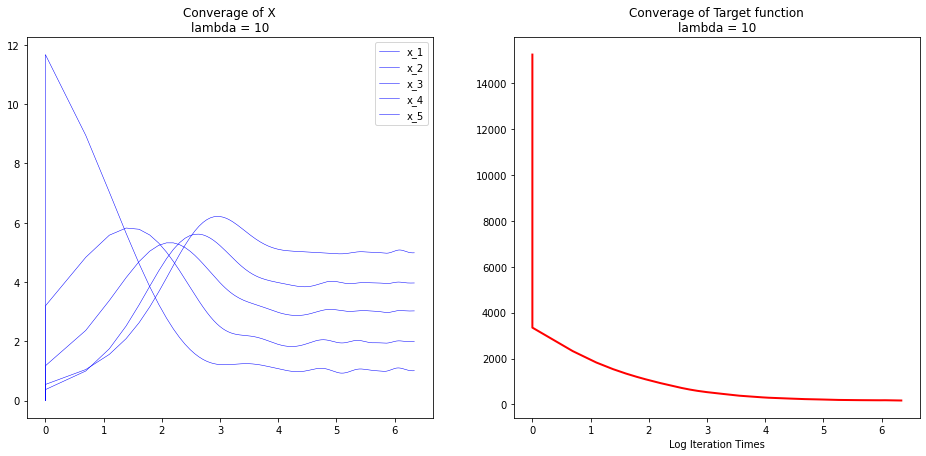

In [6]:
# BCD方法
def BCD_for_Lasso(A,b,eps,step,lam):
    t = 0 #计数器
    s = step
    x = np.zeros([A.shape[1], 1])# 初始值全0矩阵
    err = np.inf
    result_matrix = np.c_[t,x.T,target_function(x)]
    while (err > eps and t < 1e7):
        origin_x = np.array(x, copy=True)
        for k in range(A.shape[1]):
            Ak = A[:,k]
            A_tilde = np.delete(A, k, axis=1)
            x_tilde = np.mat(np.delete(x, k)).T
            x[k] = Soft_Thresholding(s*lam,Ak@(b - A_tilde@x_tilde))/(np.linalg.norm(Ak,ord=2)**2)
        fx = target_function(x)
        f_star = min(result_matrix[:,-1])
        err = abs(f_star-fx)
        t += 1
        result_matrix = np.r_[result_matrix,np.c_[t,x.T,fx]] #结果存入矩阵方便画图
        # print (fx)
    print("*"*100 + "\nlambda为：{lam}\n迭代次数为：{t}\n目标函数最优值为：{fx} \n最优解为：\n{x}\n".format(lam = lam,t = t, fx = fx,x = list(x.T)))
    return result_matrix
colnames = ["iteration​"] + ["x_{}".format(i) for i in range(1,A.shape[1]+1)] + ["target_function"] #创建result_matrix的列名列表，形如：["iteration​","x_1","x_2",...,"x_100","target_function"]
result4 = BCD_for_Lasso(A,b,eps = 1e-3,step = 1e-4,lam = 0.1)
make_plot(result4,colnames,0.1,"BCD")
result5 =  BCD_for_Lasso(A,b,eps = 1e-3,step = 1e-4,lam = 1)
make_plot(result5,colnames,1,"BCD")
result6 =  BCD_for_Lasso(A,b,eps = 1e-3,step = 1e-4,lam = 10)
make_plot(result6,colnames,10,"BCD")

# ADMM

****************************************************************************************************
lambda为：0.1
迭代次数为：334
目标函数最优值为：164.79324365355603 
最优解为：
[matrix([[ 1.02970622e+00,  1.97642761e+00,  3.01118604e+00,
          3.96765916e+00,  5.00800434e+00,  1.06087319e-02,
          1.18246687e-02,  8.76393437e-04, -6.86140171e-03,
          1.11746864e-02,  4.93325355e-04, -2.90725668e-03,
         -1.44474759e-02, -5.17645035e-03,  1.97865533e-02,
         -1.02207244e-02, -8.93153509e-03,  5.59552102e-03,
          8.79681189e-03,  1.91409369e-02,  1.06757587e-02,
         -1.20611001e-02, -8.84902765e-03,  1.56241988e-02,
          2.65209512e-02, -8.53362914e-03, -1.60801403e-02,
          9.42413209e-04, -1.29524738e-02, -1.53990211e-02,
          1.94230433e-02, -3.11569398e-02, -7.76844682e-04,
          6.53447106e-03, -1.93753204e-02, -9.55076653e-03,
         -1.75440918e-03,  2.00948904e-02,  1.77134844e-02,
         -1.59084078e-02, -1.34106139e-02,  7.27376816e-03,
 

C:\Python39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Python39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Python39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when

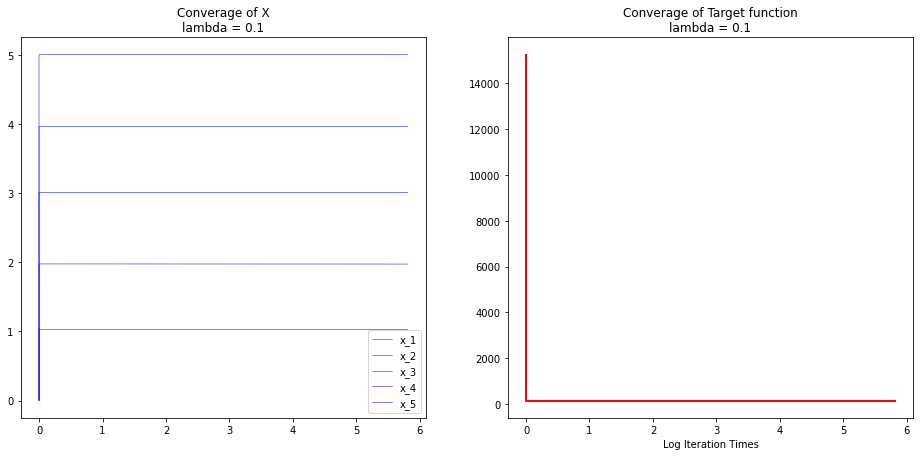

****************************************************************************************************
lambda为：1
迭代次数为：3337
目标函数最优值为：163.8387330692975 
最优解为：
[matrix([[ 1.02158966e+00,  1.95916135e+00,  2.98374476e+00,
          3.94307433e+00,  4.97981373e+00,  1.27413185e-02,
          1.41354738e-02, -7.38979751e-04, -5.13245042e-03,
          1.76793271e-02,  3.47270612e-03, -1.19751802e-03,
         -1.07766997e-02, -5.27846030e-03,  2.08390345e-02,
         -7.32704269e-03, -3.04350426e-03,  1.18142003e-02,
          1.14848680e-02,  2.07399348e-02,  9.77833964e-03,
         -1.16798695e-02, -1.06874799e-02,  1.38886152e-02,
          2.48729916e-02, -8.46284241e-03, -1.81259166e-02,
          1.91938785e-03, -1.64486656e-02, -1.33029778e-02,
          1.57271814e-02, -2.70506863e-02, -8.71692785e-04,
          1.16651252e-02, -1.79280818e-02, -1.04074208e-02,
          1.86005006e-04,  1.84335619e-02,  1.58370865e-02,
         -1.37380708e-02, -9.80320881e-03,  3.82844347e-03,
   

C:\Python39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Python39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Python39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when

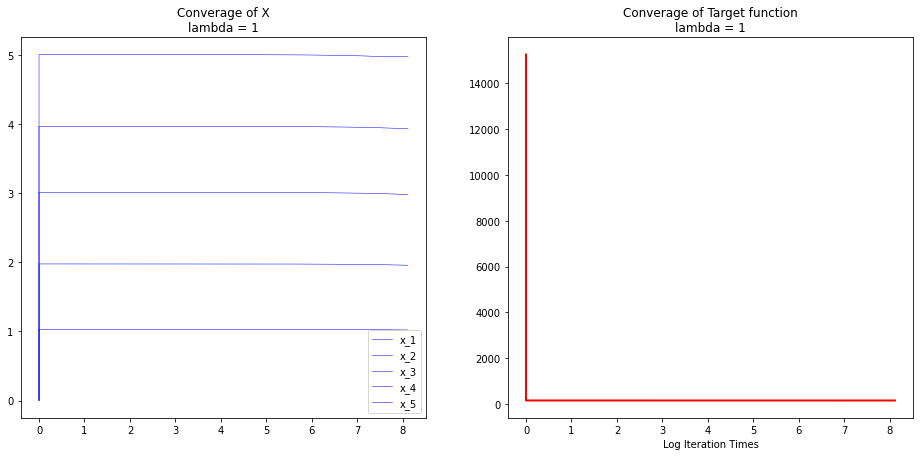

****************************************************************************************************
lambda为：10
迭代次数为：4590
目标函数最优值为：163.6493323136842 
最优解为：
[matrix([[ 1.01813511e+00,  1.95179719e+00,  2.97173512e+00,
          3.92133246e+00,  4.94000000e+00,  1.53538226e-02,
          1.46185604e-02, -1.73221091e-03, -5.26820522e-03,
          2.47835518e-02,  5.99261112e-03,  7.84215971e-04,
         -9.02986504e-03, -6.57820776e-03,  2.13049255e-02,
         -4.94058265e-03,  8.29632243e-04,  1.75785839e-02,
          1.54091329e-02,  2.11383552e-02,  8.28875006e-03,
         -1.09932382e-02, -1.26377114e-02,  1.44693748e-02,
          2.50231240e-02, -1.01328179e-02, -1.90375505e-02,
          4.70370694e-03, -1.97680316e-02, -1.02952338e-02,
          1.45962597e-02, -2.31726594e-02, -1.64736216e-05,
          1.79747076e-02, -1.68412269e-02, -1.11955389e-02,
          1.06767241e-03,  1.64516877e-02,  1.32762876e-02,
         -1.04646821e-02, -7.27358963e-03,  2.83293650e-03,
  

C:\Python39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Python39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Python39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when

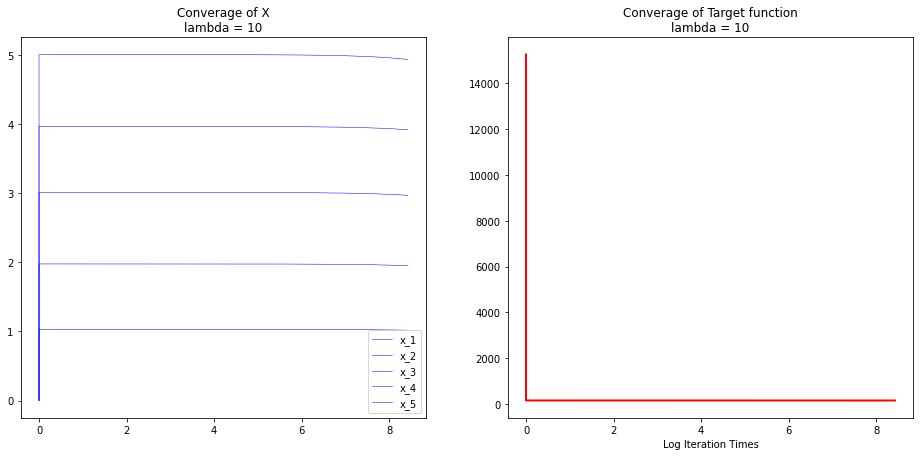

In [4]:
def ADMM_for_Lasso(A,b,eps,rou,lam):
    t = 0 #计数器
    s = rou
    n = A.shape[1] # dim
    x = np.zeros([n, 1])# 初始值全0矩阵
    z = np.zeros([n, 1])
    u = np.zeros([n, 1])
    err = np.inf
    result_matrix = np.c_[t,x.T,target_function(x)]
    while (err > eps and t < 1e7):
        x = np.mat((A.T@A+s*np.identity(n))).I@(A.T@b+s*(z-u))
        z = Soft_Thresholding(lam/s,x+u)
        u = u+x-z
        f_star = min(result_matrix[:,-1])
        fx = target_function(x)
        err = abs(f_star-fx)
        t += 1
        result_matrix = np.r_[result_matrix,np.c_[t,x.T,fx]] #结果存入矩阵方便画图
        # print (fx)
    print("*"*100 + "\nlambda为：{lam}\n迭代次数为：{t}\n目标函数最优值为：{fx} \n最优解为：\n{x}\n".format(lam = lam,t = t, fx = fx,x = list(x.T)))
    return result_matrix
colnames = ["iteration​"] + ["x_{}".format(i) for i in range(1,A.shape[1]+1)] + ["target_function"] #创建result_matrix的列名列表，形如：["iteration​","x_1","x_2",...,"x_100","target_function"]
result4 = ADMM_for_Lasso(A,b,eps = 1e-4,rou = 1e-4,lam = 0.1)
make_plot(result4,colnames,0.1,"ADMM")
result5 =  ADMM_for_Lasso(A,b,eps = 1e-4,rou = 1e-4,lam = 1)
make_plot(result5,colnames,1,"ADMM")
result6 =  ADMM_for_Lasso(A,b,eps = 1e-4,rou = 1e-4,lam = 10)
make_plot(result6,colnames,10,"ADMM")

# 逻辑回归

## SGD 固定步长


In [5]:
import pandas as pd
import numpy as np
np.random.seed(2021)
#########数据预处理############
def make_data(dataset): #将数据处理成123维和
    m = dataset.shape[0]
    A = np.zeros([m,123])
    b = list(dataset[:,0].T)
    for i in range(m):
        for dics in dataset[i,1:]:
            if dics is not np.NaN:
                [n,value] = [int(dic) for dic in dics.split(":")] #将字符串分割，例如6:1表示下标为6的字符串的值为1
                A[i,n-1] = value
    return (A,b)
data = pd.read_table("a9a", header=None, delimiter=" ").iloc[:,:-1].values
(A,b) = make_data(data)

##########逻辑回归损失函数#########
def loss_function(A,b,x,lam):
    m = A.shape[1]
    return np.average([np.log(1 + np.exp(-b[i]*(A[i,:]@x))) for i in range(m)]) + lam*np.linalg.norm(x,ord=2)**2
def dfi(A,b,x,lam,i): #第i个分量梯度
    return 2*lam*x - np.mat(((np.exp(-b[i]*(A[i,:]@x))*b[i]*A[i,:])/(1 + np.exp(-b[i]*(A[i,:]@x))))).T

# 有固定步长的随机梯度下降法

In [6]:
def SGD_Fixed_Step(A,b,eps,step,lam):
    t = 0 #计数器
    s = step
    m = A.shape[0]
    x = np.zeros([A.shape[1], 1])# 初始值全0矩阵
    err = np.inf
    result_matrix = np.c_[t,x.T,loss_function(A,b,x,lam)]
    while (err > eps and t < 1e7):
        origin_x = x
        i = np.random.randint(0,m-1)
        x = x - s*dfi(A,b,x,lam,i)
        fx = loss_function(A,b,x,lam)
        f_star = min(result_matrix[:,-1])
        err = abs(f_star-fx)
        t += 1
        result_matrix = np.r_[result_matrix,np.c_[t,x.T,fx]] #结果存入矩阵方便画图
        print (fx) #调试用代码
    f_star = min(result_matrix[:,-1])
    print("*"*100 + "\nlambda为：{lam}\n迭代次数为：{t}\n目标函数最优值为：{fx} \n最优解为：\n{x}\n".format(lam = lam,t = t, fx = f_star,x = list(x.T)))
    return result_matrix
colnames = ["iteration​"] + ["x_{}".format(i) for i in range(1,A.shape[1]+1)] + ["target_function"] #创建result_matrix的列名列表，形如：["iteration​","x_1","x_2",...,"x_100","target_function"]
result4 = SGD_Fixed_Step(A,b,eps = 1e-6,step = 1e-2,lam = 1e-2/A.shape[0]) #lam = 1e-2/N
pd.DataFrame(columns=colnames,data=result4).to_csv('result4.csv')

0.6855252252230492
0.679588604884627
0.6711736041317623
0.6629882788558242
0.671001219805945
0.6644636133511855
0.6724539824217195
0.6659228068422761
0.6586777070531828
0.6509741110172903
0.6462814372645107
0.6396931745172978
0.6338716618288279
0.6300888526417178
0.6260032251433525
0.6208380240971272
0.6159794929061843
0.6121005502068937
0.6085477412061102
0.6037056522732752
0.6075243062553397
0.6113339888534621
0.6067217400586429
0.6019665722283666
0.5979235211341742
0.6016474735889318
0.5993133635389848
0.595157533377349
0.5915942874035229
0.5884765645585338
0.5856808251099276
0.5873208258002343
0.5844557406313711
0.5894900183018348
0.5854547008794599
0.5821044832908755
0.579280947884654
0.5768454766769394
0.5742670576422347
0.5716804365917681
0.5689818422658368
0.5662327244498121
0.5636080506462947
0.5687689911856045
0.5660743753710559
0.5636238665713577
0.5611967449640821
0.5634784181905012
0.566472196582777
0.5711948065061755
0.5751156053945826
0.5791972588512679
0.575657042418917

# 下降步长的随机梯度下降法

In [7]:
def SGD_Diminishing_Step(A,b,eps,step,lam):
    t = 0 #计数器
    s = step
    m = A.shape[0]
    x = np.zeros([A.shape[1], 1])# 初始值全0矩阵
    err = np.inf
    result_matrix = np.c_[t,x.T,loss_function(A,b,x,lam)]
    while (err > eps and t < 1e7):
        origin_x = x
        i = np.random.randint(0,m-1)
        s = s*0.995
        x = x - s*dfi(A,b,x,lam,i)
        fx = loss_function(A,b,x,lam)
        f_star = min(result_matrix[:,-1])
        err = np.linalg.norm(origin_x - x,ord=1)
        t += 1
        result_matrix = np.r_[result_matrix,np.c_[t,x.T,fx]] #结果存入矩阵方便画图
        print (fx) #调试用代码
    f_star = min(result_matrix[:,-1])
    print("*"*100 + "\nlambda为：{lam}\n迭代次数为：{t}\n目标函数最优值为：{fx} \n最优解为：\n{x}\n".format(lam = lam,t = t, fx = f_star,x = list(x.T)))
    return result_matrix
colnames = ["iteration​"] + ["x_{}".format(i) for i in range(1,A.shape[1]+1)] + ["target_function"] #创建result_matrix的列名列表，形如：["iteration​","x_1","x_2",...,"x_100","target_function"]
result5 = SGD_Diminishing_Step(A,b,eps = 1e-6,step = 1e-2,lam = 1e-2/A.shape[0]) #lam = 1e-2/N
pd.DataFrame(columns=colnames,data=result5).to_csv('result5.csv')

0.6843513654760625
0.6761752054700794
0.6820636763531623
0.6881778290863323
0.6812196650973481
0.6870551860403217
0.6797969766472313
0.6711434535871492
0.6651618290799718
0.6718405516749745
0.6799362256069624
0.6726195080785861
0.665264990986482
0.6582692241643017
0.651856466796685
0.6456905049234994
0.6411918014416652
0.6357025837466633
0.6317548671853334
0.636224019791661
0.6311393696266665
0.6258176120547712
0.6208018707049507
0.616872821444099
0.6137665872461513
0.6088805814397611
0.6057971220710899
0.6019655586705243
0.6056603305713794
0.6020110690727155
0.5975807072261777
0.5947169537413783
0.5914199739157892
0.5939343405021051
0.5909943600100659
0.5882468513031576
0.5914864717880146
0.5879227953232325
0.5854544842209126
0.5825585052220662
0.5794255551364043
0.5766307466978999
0.5807036977112398
0.5780322612471192
0.5754578980827141
0.5779928475301871
0.5754169590150543
0.5734895885781807
0.577442483565931
0.575457346277559
0.5739233874145223
0.5711665101280783
0.5685680923785795

# SVRG

In [8]:
def SVRG(A,b,eps,learning_rate,lam,T):
    s = 0 #计数器
    step = learning_rate
    m = A.shape[0]
    x_tilde = np.zeros([A.shape[1], 1])# 初始值全0矩阵
    err = np.inf
    result_matrix = np.c_[s,x_tilde.T,loss_function(A,b,x_tilde,lam)]
    while ((err > eps or err == 0) and s < 1e7): #防止因为t选择0导致err = 0，直接弹出循环 
        origin_x = x_tilde
        z_tilde = np.average([dfi(A,b,x_tilde,lam,i) for i in range(m)])
        x = {0:x_tilde}
        for t in range(1,T+1): #进行T步迭代后计算一次全梯度     
            i = np.random.randint(0,m-1)
            x[t] = x[t-1] - step*(dfi(A,b,x[t-1],lam,i) - dfi(A,b,x_tilde,lam,i) + z_tilde)
        t = np.random.randint(0,T-1)
        x_tilde = x[t]
        fx = loss_function(A,b,x_tilde,lam)
        f_star = min(result_matrix[:,-1])
        err = abs(f_star-fx)
        s += 1
        result_matrix = np.r_[result_matrix,np.c_[s,x_tilde.T,fx]] #结果存入矩阵方便画图
        print (fx) #调试用代码
    f_star = min(result_matrix[:,-1])
    print("*"*100 + "\nlambda为：{lam}\n迭代次数为：{t}\n目标函数最优值为：{fx} \n最优解为：\n{x}\n".format(lam = lam,t = t, fx = f_star,x = list(x_tilde.T)))
    return result_matrix
colnames = ["iteration​"] + ["x_{}".format(i) for i in range(1,A.shape[1]+1)] + ["target_function"] #创建result_matrix的列名列表，形如：["iteration​","x_1","x_2",...,"x_100","target_function"]
result6 = SVRG(A,b,eps = 1e-6,learning_rate = 1e-2,lam = 1e-2/A.shape[0], T = 10) #lam = 1e-2/N
pd.DataFrame(columns=colnames,data=result6).to_csv('result6.csv')

0.6865804279027209
0.6865804279027209
0.6837817127263989
0.6768591051592702
0.6719055671673186
0.6694704957317709
0.6678658428560152
0.667067587205517
0.6662756920135334
0.6618126027136402
0.6610626744602991
0.655476831024087
0.6534197622185073
0.6501521476820685
0.6452358387034084
0.6428358969354186
0.6416510957123822
0.6382772246104386
0.6345553293586873
0.6319812922034839
0.6281667794528678
0.6272075594460491
0.6249203327468759
0.6240130166160637
0.6210484751664842
0.6202018030642726
0.618965956613837
0.618965956613837
0.6185546497171658
0.6155000041666386
0.6151156719731635
0.6143594188431383
0.613254323952823
0.6128874368149276
0.6101559716752903
0.6078873572414166
0.6072429382442932
0.6048608978231388
0.6036852338706886
0.6031040791362517
0.6025329061010987
0.6003919030406043
0.5993528890422927
0.5978601259422912
0.5964404759695987
0.5952948154554918
0.5950658631210832
0.5946159533258959
0.5931317457725861
0.5929191683690066
0.5927081973823229
0.5920919615933032
0.591487606659872

# 画图

C:\Python39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Python39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Python39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when

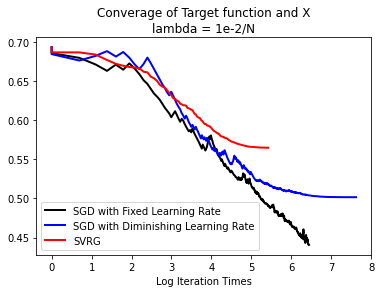

In [15]:
import matplotlib.pyplot as plt
def make_plot(result_matrix,label,color):
    x = [0.]+list(np.log(result_matrix[1:,0])) # 对x轴进行log采样
    plt.plot(x,result_matrix[:,-1],label = label,linewidth = 2, color = color)
plt.xlabel("Log Iteration Times")
plt.title("Converage of Target function and X\nlambda = {}".format("1e-2/N"))
make_plot(result4,"SGD with Fixed Learning Rate","black")
make_plot(result5,"SGD with Diminishing Learning Rate","blue")
make_plot(result6,"SVRG","red")
plt.legend()
plt.savefig("Converage of Logistic Regression.png",dpi=500)
plt.show()
